# AdelaiDepth ResNet101 Test
A notebook to test monocular depth estimation and 3D scene reconstruction from single RGB images using the Open Source [AdelaiDepth](https://github.com/aim-uofa/AdelaiDepth) toolbox.  This notebook is derived from the original one available in the official GitHub repo for the toolbox and other than some code refactoring, it includes also the possibility to perform 3D scene reconstruction (not available in the original).  


```
@inproceedings{Yin2019enforcing,
  title={Enforcing geometric constraints of virtual normal for depth prediction},
  author={Yin, Wei and Liu, Yifan and Shen, Chunhua and Yan, Youliang},
  booktitle= {The IEEE International Conference on Computer Vision (ICCV)},
  year={2019}
}

@inproceedings{Wei2021CVPR,
  title     =  {Learning to Recover 3D Scene Shape from a Single Image},
  author    =  {Wei Yin and Jianming Zhang and Oliver Wang and Simon Niklaus and Long Mai and Simon Chen and Chunhua Shen},
  booktitle =  {Proc. IEEE Conf. Comp. Vis. Patt. Recogn. (CVPR)},
  year      =  {2021}
}

@article{yin2021virtual,
  title={Virtual Normal: Enforcing Geometric Constraints for Accurate and Robust Depth Prediction},
  author={Yin, Wei and Liu, Yifan and Shen, Chunhua},
  journal={IEEE Transactions on Pattern Analysis and Machine Intelligence (TPAMI)},
  year={2021}
}

@article{yin2020diversedepth,
  title={DiverseDepth: Affine-invariant Depth Prediction Using Diverse Data},
  author={Yin, Wei and Wang, Xinlong and Shen, Chunhua and Liu, Yifan and Tian, Zhi and Xu, Songcen and Sun, Changming and Renyin, Dou},
  journal={arXiv preprint arXiv:2002.00569},
  year={2020}
}
```



## Settings

Clone the official GitHub repository.

In [ ]:
!git clone https://github.com/aim-uofa/AdelaiDepth

Cloning into 'AdelaiDepth'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 239 (delta 75), reused 150 (delta 38), pack-reused 0
Receiving objects: 100% (239/239), 44.52 MiB | 29.75 MiB/s, done.
Resolving deltas: 100% (75/75), done.


Download the AdelaiDepth with ResNet101 pretrained model.

In [ ]:
!wget -O /content/AdelaiDepth/res101.pth https://cloudstor.aarnet.edu.au/plus/s/lTIJF4vrvHCAI31/download

--2021-12-02 17:26:26--  https://cloudstor.aarnet.edu.au/plus/s/lTIJF4vrvHCAI31/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=93g97ojehjlhu3bo0itto7tr83; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=E3p%2FP%2FvDdgQgwlOYVYpo7k0fnVI%2B60hACYbBaPfv6PPkHowLdONs7cVdS%2BlMWahF332HoDGWonKAqjZGUFWEx8X3xYP8N02ZJVolPv2agwFFjiQJMCzba54oL9orLM21; path=/plus;; Secure at position 170.
Length: 530760553 (506M) [application/octet-stream]
Saving to: ‘/content/AdelaiDepth/res101.pth’

/content/AdelaiDept 100%[===================>] 506.17M  4.90MB/s    in 1m 43s  

2021-12-02 17:28:11 (4.91 MB/s) - ‘/content/AdelaiDepth/res101.pth’ saved [530760553/530760553]



Add the LeReS directory and sub-directories to the Python Path.

In [ ]:
import sys
import os

sys.path.append('/content/AdelaiDepth/LeReS')
os.environ["PYTHONPATH"] += (":/content/AdelaiDepth/LeReS")

Remove the test images.

In [ ]:
%%shell
if [ -n "`ls -A /content/AdelaiDepth/LeReS/test_images/`" ]; then
  rm -rf /content/AdelaiDepth/LeReS/test_images/*
  echo "Cleaned"
fi

Cleaned


Implement a function to upload your own images into a given directory.

In [ ]:
import os
import shutil
from google.colab import files

def upload_files(upload_path):
  uploaded = files.upload()
  for filename, content in uploaded.items():
    dst_path = os.path.join(upload_path, filename)
    shutil.move(filename, dst_path)
  return list(uploaded.keys())

## Depth Estimation

Upload one or multiple images (the destination directory is ./content/AdelaiDepth/LeRes/test_images).

In [ ]:
image_input_dir = '/content/AdelaiDepth/LeReS/test_images/'
upload_files(image_input_dir)

Saving pexels-max-vakhtbovych-7587314.jpg to pexels-max-vakhtbovych-7587314.jpg


['pexels-max-vakhtbovych-7587314.jpg']

Run the network for monocular depth prediction on the uploaded image(s).

In [ ]:
%cd ./AdelaiDepth

/content/AdelaiDepth


In [ ]:
!python LeReS/tools/test_depth.py --load_ckpt res101.pth --backbone resnext101

loading checkpoint res101.pth
processing (0000)-th image... LeReS/test_images/pexels-max-vakhtbovych-7587314.jpg


Display input images and results.

pexels-max-vakhtbovych-7587314-depth_raw.png
pexels-max-vakhtbovych-7587314.jpg
pexels-max-vakhtbovych-7587314-depth.png


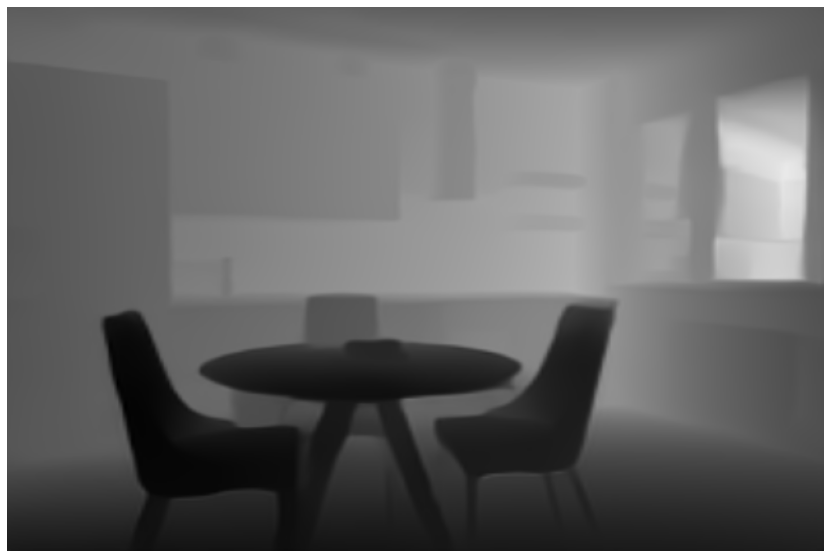

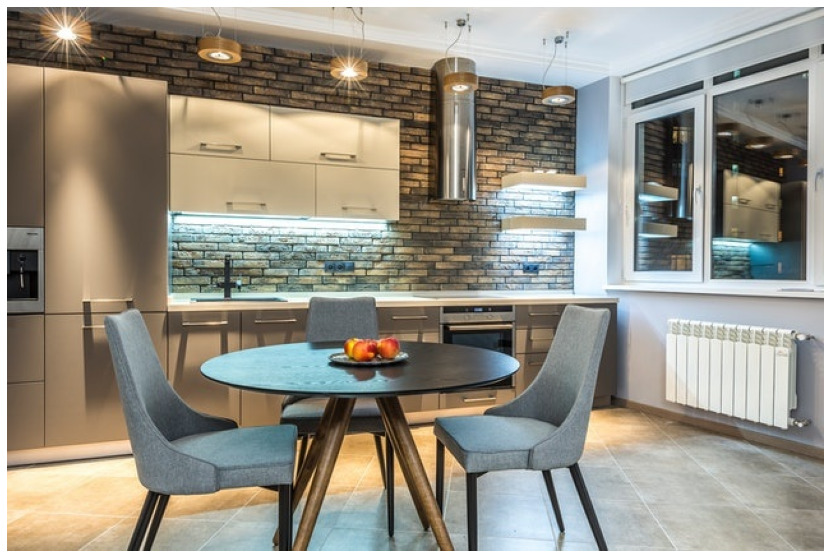

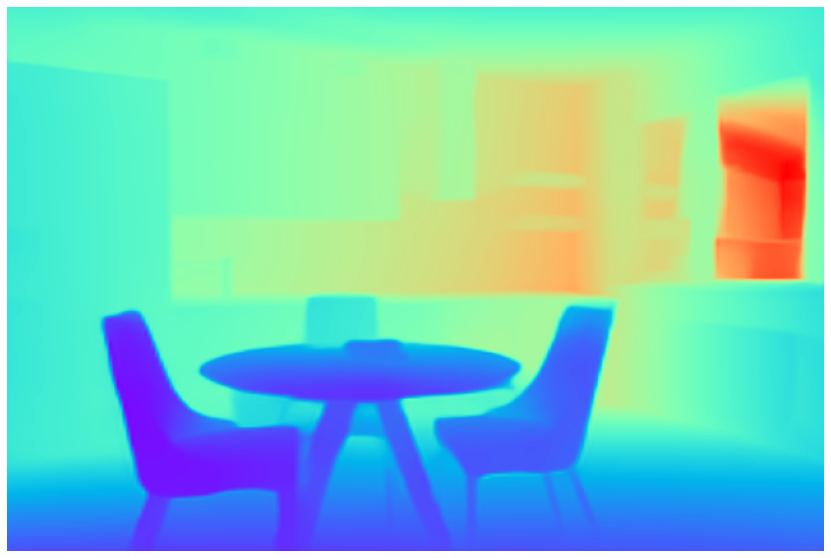

In [ ]:
import matplotlib.pyplot as plt
import cv2

image_output_dir = image_input_dir + 'outputs'
items = os.listdir(image_output_dir)    

for each_image in items:
  if each_image.endswith(".jpg") or each_image.endswith(".png"):
    print(each_image)
    full_path = image_output_dir + '/' + each_image
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
    plt.grid(False)
    plt.axis('off')

## 3D Scene Reconstruction

Install torchsparse before doing 3D reconstruction.

In [ ]:
!sudo apt-get install libsparsehash-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libsparsehash-dev
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 72.4 kB of archives.
After this operation, 612 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libsparsehash-dev all 2.0.2-1 [72.4 kB]
Fetched 72.4 kB in 1s (138 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libsparsehash-dev.
(Reading database ... 155222 fi

In [ ]:
!pip install --upgrade git+https://github.com/mit-han-lab/torchsparse.git@v1.2.0

  Cloning https://github.com/mit-han-lab/torchsparse.git (to revision v1.2.0) to /tmp/pip-req-build-tql9cj82
  Running command git clone -q https://github.com/mit-han-lab/torchsparse.git /tmp/pip-req-build-tql9cj82
  Running command git checkout -q e268836e64513b9a31c091cd1d517778d4c1b9e6
  Created wheel for torchsparse: filename=torchsparse-1.2.0-cp37-cp37m-linux_x86_64.whl size=16591467 sha256=e1508daf1f9d7ba72d7472f9bc2dd3b81bff3ea0a51d61e61a45d25422de20ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-zymvgs3y/wheels/83/c0/40/259f21b259f349a1e312401764c48a917e0dbf80de6dc49ac9
Successfully built torchsparse


Install the missing requirements for 3D reconstruction. Only *plyfile* is missing in the Colab runtime.

In [ ]:
!pip install plyfile

Run for 3D reconstruction.

In [ ]:
!python LeReS/tools/test_shape.py --load_ckpt res101.pth --backbone resnext101 

loading checkpoint res101.pth
processing (0000)-th image... LeReS/test_images/pexels-max-vakhtbovych-7587314.jpg


Display the generated 3D Point Cloud using the [pyntcloud](https://github.com/daavoo/pyntcloud) library.

In [ ]:
!pip install pyntcloud

     |████████████████████████████████| 346 kB 4.9 MB/s 


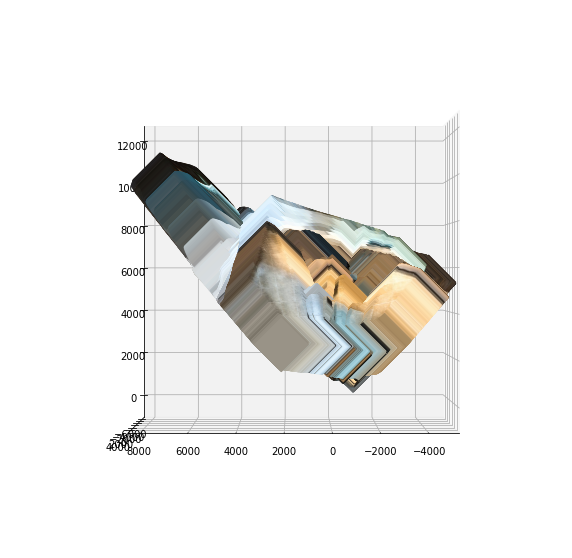

In [ ]:
import numpy as np
from pyntcloud import PyntCloud

items = os.listdir(image_output_dir)
for each_file in items:
  if each_file.endswith(".ply"):
    cloud = PyntCloud.from_file(image_output_dir + '/' + each_file)

    cloud.plot()